# Install and Functions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [ ]:
def read_output_files(folder_path):
    dfs = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.pkl'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'rb') as file:
                df = pickle.load(file)
                dfs.append(df)
    if dfs:
        combined_df = pd.concat(dfs, ignore_index=True)
        return combined_df
    else:
        print("No pickle files found in the folder.")
        return None
out_path = 'Output'

# Regression

## Regression optfl='N'

In [ ]:
ds_model = read_output_files(out_path)
ds_model_srt = ds_model.sort_values(by='PercentRemoved')
ds_model_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.751279,0.00
1,2,0.748945,0.07
2,2,0.745726,0.14
3,2,0.747628,0.21
4,2,0.748423,0.28
...,...,...,...
1296,2,0.755026,90.72
1297,2,0.753938,90.79
1298,2,0.758125,90.86
1299,2,0.753998,90.93


In [ ]:
hg_acc_rg = ds_model_srt['Accuracy'].max()
lw_acc_rg = ds_model_srt['Accuracy'].min()
base_acc_rg = ds_model_srt['Accuracy'].iloc[0]


acc_hl_rg = hg_acc_rg - lw_acc_rg
acc_hb_rg = hg_acc_rg - base_acc_rg
acc_lb_rg = lw_acc_rg - base_acc_rg

print("Difference between highest and lowest accuracy:", acc_hl_rg)
print("Difference between highest and base accuracy:", acc_hb_rg)
print("Difference between lowest and base accuracy:", acc_lb_rg)

rgkeyval = {
    'high_acc': [hg_acc_rg],
    'low_acc': [lw_acc_rg],
    'base_acc': [base_acc_rg],
    'diff_high_low': [acc_hl_rg],
    'diff_high_base': [acc_hb_rg],
    'diff_low_base': [acc_lb_rg]
}

dataf = pd.DataFrame(rgkeyval)
dataf

Difference between highest and lowest accuracy: 0.03467642829385875
Difference between highest and base accuracy: 0.01735029216097661
Difference between lowest and base accuracy: -0.01732613613288214


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.768352,0.733676,0.751002,0.034676,0.01735,-0.017326


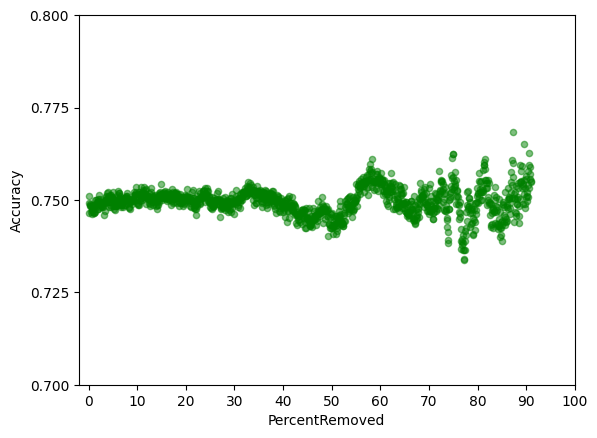

In [ ]:
ds_model_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.8, 0.025))
plt.show()


## Regression optfl='Y'

In [ ]:
ds_model1 = read_output_files(out_path)
ds_model_srt1 = ds_model1.sort_values(by='PercentRemoved')
ds_model_srt1

,model__C,model__class_weight,model__penalty,model__solver,Accuracy,PercentRemoved
820,0.010000,balanced,l1,liblinear,0.751002,0.00
821,0.010000,balanced,l1,liblinear,0.749360,0.07
822,0.010000,balanced,l1,liblinear,0.746557,0.14
823,0.010000,balanced,l1,liblinear,0.748736,0.21
824,0.043940,balanced,l1,liblinear,0.749255,0.28
...,...,...,...,...,...,...
1102,0.026827,None,l2,saga,0.749069,90.72
1103,0.071969,balanced,l1,liblinear,0.757689,90.79
1104,0.016379,balanced,l1,liblinear,0.758125,90.86
1105,0.026827,balanced,l1,saga,0.751714,90.93


In [ ]:
hg_acc_rg = ds_model_srt1['Accuracy'].max()
lw_acc_rg = ds_model_srt1['Accuracy'].min()
base_acc_rg = ds_model_srt1['Accuracy'].iloc[0]


acc_hl_rg = hg_acc_rg - lw_acc_rg
acc_hb_rg = hg_acc_rg - base_acc_rg
acc_lb_rg = lw_acc_rg - base_acc_rg

print("Difference between highest and lowest accuracy:", acc_hl_rg)
print("Difference between highest and base accuracy:", acc_hb_rg)
print("Difference between lowest and base accuracy:", acc_lb_rg)

rgkeyval = {
    'high_acc': [hg_acc_rg],
    'low_acc': [lw_acc_rg],
    'base_acc': [base_acc_rg],
    'diff_high_low': [acc_hl_rg],
    'diff_high_base': [acc_hb_rg],
    'diff_low_base': [acc_lb_rg]
}

dataf = pd.DataFrame(rgkeyval)
dataf

Difference between highest and lowest accuracy: 0.031688219160683206
Difference between highest and base accuracy: 0.015175197000563356
Difference between lowest and base accuracy: -0.01651302216011985


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.766177,0.734489,0.751002,0.031688,0.015175,-0.016513


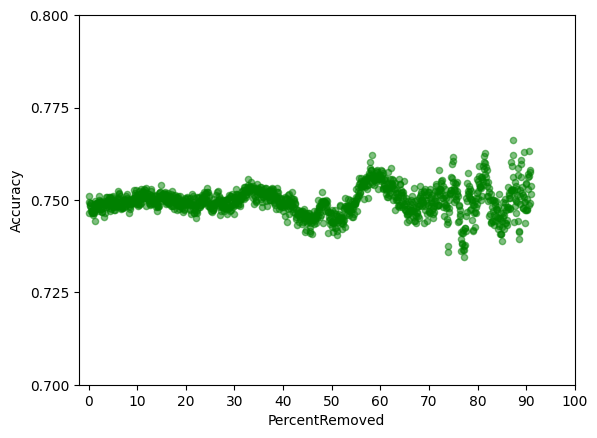

In [ ]:
ds_model_srt1.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.8, 0.025))
plt.show()

# Decision Tree

## Decision Tree optfl='N'

In [ ]:
ds_model_dtn = read_output_files(out_path)
ds_model_dtn_srt = ds_model_dtn.sort_values(by='PercentRemoved')
ds_model_dtn_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.734001,0.00
1,2,0.737326,0.07
2,2,0.734168,0.14
3,2,0.735924,0.21
4,2,0.736780,0.28
...,...,...,...
1296,2,0.744602,90.72
1297,2,0.746437,90.79
1298,2,0.744520,90.86
1299,2,0.741813,90.93


In [ ]:
hg_acc_dt = ds_model_dtn_srt['Accuracy'].max()
lw_acc_dt = ds_model_dtn_srt['Accuracy'].min()
base_acc_dt = ds_model_dtn_srt['Accuracy'].iloc[0]


acc_hl_dt = hg_acc_dt - lw_acc_dt
acc_hb_dt = hg_acc_dt - base_acc_dt
acc_lb_dt = lw_acc_dt - base_acc_dt

print("Difference between highest and lowest accuracy:", acc_hl_dt)
print("Difference between highest and base accuracy:", acc_hb_dt)
print("Difference between lowest and base accuracy:", acc_lb_dt)

dtkeyval = {
    'high_acc': [hg_acc_dt],
    'low_acc': [lw_acc_dt],
    'base_acc': [base_acc_dt],
    'diff_high_low': [acc_hl_dt],
    'diff_high_base': [acc_hb_dt],
    'diff_low_base': [acc_lb_dt]
}

dataf_dt = pd.DataFrame(dtkeyval)
dataf_dt

Difference between highest and lowest accuracy: 0.028670530456501697
Difference between highest and base accuracy: 0.022041338459560245
Difference between lowest and base accuracy: -0.0066291919969414526


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.756043,0.727372,0.734001,0.028671,0.022041,-0.006629


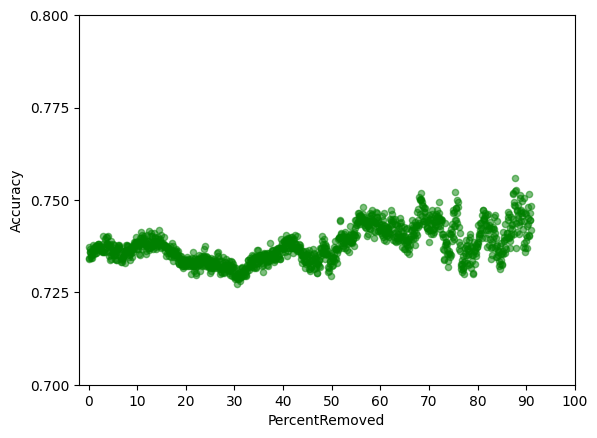

In [ ]:
ds_model_dtn_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.8, 0.025))
plt.show()

## Decision Tree optfl='Y'

In [ ]:
ds_model_dty = read_output_files(out_path)
ds_model_dty_srt = ds_model_dty.sort_values(by='PercentRemoved')
ds_model_dty_srt

,model__class_weight,model__max_depth,model__max_features,model__min_samples_leaf,model__min_samples_split,Accuracy,PercentRemoved
735,balanced,10,sqrt,15,70,0.734001,0.00
736,balanced,10,sqrt,21,30,0.731378,0.07
737,balanced,10,sqrt,8,70,0.727178,0.14
738,balanced,8,sqrt,15,85,0.726020,0.21
739,balanced,10,sqrt,15,85,0.728879,0.28
...,...,...,...,...,...,...,...
730,balanced,10,sqrt,21,85,0.706627,90.72
731,balanced,10,log2,21,30,0.699925,90.79
732,balanced,10,sqrt,15,85,0.708239,90.86
733,balanced,10,log2,25,85,0.703732,90.93


In [ ]:
hg_acc_dty = ds_model_dty_srt['Accuracy'].max()
lw_acc_dty = ds_model_dty_srt['Accuracy'].min()
base_acc_dty = ds_model_dty_srt['Accuracy'].iloc[0]


acc_hl_dty = hg_acc_dty - lw_acc_dty
acc_hb_dty = hg_acc_dty - base_acc_dty
acc_lb_dty = lw_acc_dty - base_acc_dty

print("Difference between highest and lowest accuracy:", acc_hl_dty)
print("Difference between highest and base accuracy:", acc_hb_dty)
print("Difference between lowest and base accuracy:", acc_lb_dty)

dtykeyval = {
    'high_acc': [hg_acc_dty],
    'low_acc': [lw_acc_dty],
    'base_acc': [base_acc_dty],
    'diff_high_low': [acc_hl_dty],
    'diff_high_base': [acc_hb_dty],
    'diff_low_base': [acc_lb_dty]
}

dataf_dty = pd.DataFrame(dtykeyval)
dataf_dty

Difference between highest and lowest accuracy: 0.06007595571912083
Difference between highest and base accuracy: 0.015052160285374372
Difference between lowest and base accuracy: -0.04502379543374646


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.749054,0.688978,0.734001,0.060076,0.015052,-0.045024


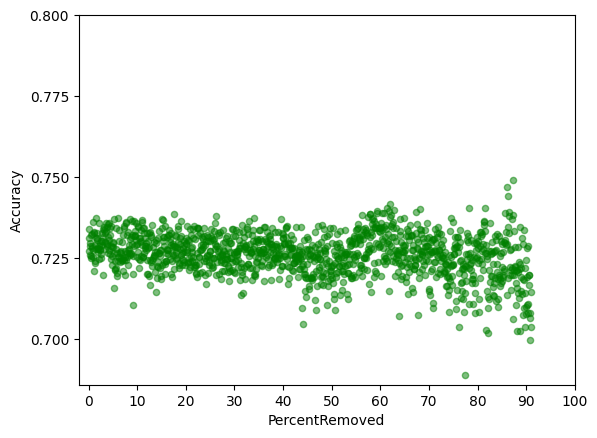

In [ ]:
ds_model_dty_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.8, 0.025))
plt.show()

# Bagging

## Bagging optfl='N'

In [ ]:
ds_model_bgn = read_output_files(out_path)
ds_model__bgn_srt = ds_model_bgn.sort_values(by='PercentRemoved')
ds_model__bgn_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.734485,0.00
1,2,0.739747,0.07
2,2,0.735899,0.14
3,2,0.737793,0.21
4,2,0.737958,0.28
...,...,...,...
1296,2,0.742368,90.72
1297,2,0.738185,90.79
1298,2,0.736206,90.86
1299,2,0.734196,90.93


In [ ]:
hg_acc_bg = ds_model__bgn_srt['Accuracy'].max()
lw_acc_bg = ds_model__bgn_srt['Accuracy'].min()
base_acc_bg = ds_model__bgn_srt['Accuracy'].iloc[0]


acc_hl_bg = hg_acc_bg - lw_acc_bg
acc_hb_bg = hg_acc_bg - base_acc_bg
acc_lb_bg = lw_acc_bg - base_acc_bg

print("Difference between highest and lowest accuracy:", acc_hl_bg)
print("Difference between highest and base accuracy:", acc_hb_bg)
print("Difference between lowest and base accuracy:", acc_lb_bg)

bgkeyval = {
    'high_acc': [hg_acc_bg],
    'low_acc': [lw_acc_bg],
    'base_acc': [base_acc_bg],
    'diff_high_low': [acc_hl_bg],
    'diff_high_base': [acc_hb_bg],
    'diff_low_base': [acc_lb_bg]
}

dataf_bg = pd.DataFrame(bgkeyval)
dataf_bg

Difference between highest and lowest accuracy: 0.03736467069612526
Difference between highest and base accuracy: 0.015696941357435934
Difference between lowest and base accuracy: -0.021667729338689323


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.750182,0.712817,0.734485,0.037365,0.015697,-0.021668


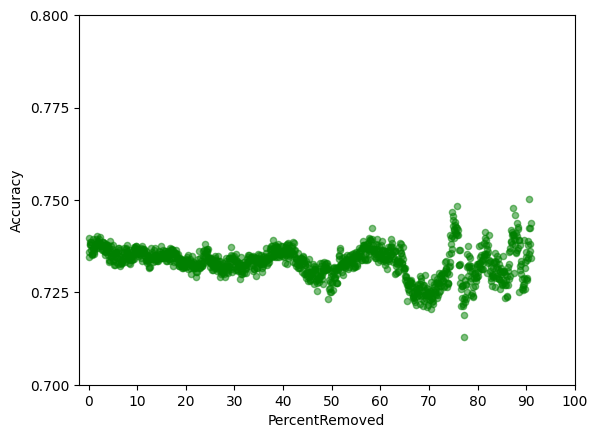

In [ ]:
ds_model__bgn_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.8, 0.025))
plt.show()

# Random Forest

## Random Forest optfl='N'

In [ ]:
ds_model_rfn = read_output_files(out_path)
ds_model_rfn_srt = ds_model_rfn.sort_values(by='PercentRemoved')
ds_model_rfn_srt

,DataSize,Accuracy,PercentRemoved
1019,2,0.749136,0.00
1020,2,0.750121,0.07
1021,2,0.746972,0.14
1022,2,0.749152,0.21
1023,2,0.749047,0.28
...,...,...,...
640,2,0.753537,90.72
641,2,0.755439,90.79
642,2,0.753590,90.86
643,2,0.751714,90.93


In [ ]:
hg_acc_rf = ds_model_rfn_srt['Accuracy'].max()
lw_acc_rf = ds_model_rfn_srt['Accuracy'].min()
base_acc_rf = ds_model_rfn_srt['Accuracy'].iloc[0]


acc_hl_rf = hg_acc_rf - lw_acc_rf
acc_hb_rf = hg_acc_rf - base_acc_rf
acc_lb_rf = lw_acc_rf - base_acc_rf

print("Difference between highest and lowest accuracy:", acc_hl_rf)
print("Difference between highest and base accuracy:", acc_hb_rf)
print("Difference between lowest and base accuracy:", acc_lb_rf)

rfkeyval = {
    'high_acc': [hg_acc_rf],
    'low_acc': [lw_acc_rf],
    'base_acc': [base_acc_rf],
    'diff_high_low': [acc_hl_rf],
    'diff_high_base': [acc_hb_rf],
    'diff_low_base': [acc_lb_rf]
}

dataf_rf = pd.DataFrame(rfkeyval)
dataf_rf

Difference between highest and lowest accuracy: 0.030143774579134308
Difference between highest and base accuracy: 0.016497352719789693
Difference between lowest and base accuracy: -0.013646421859344615


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.765633,0.73549,0.749136,0.030144,0.016497,-0.013646


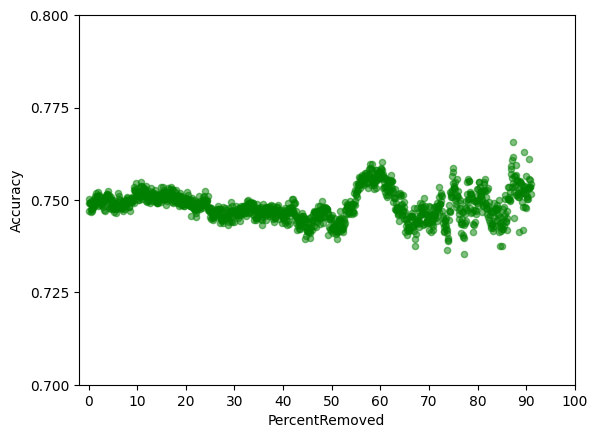

In [ ]:
ds_model_rfn_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.8, 0.025))
plt.show()

# CatBoost

## CatBoost optfl='N'

In [ ]:
ds_model_ctb = read_output_files(out_path)
ds_model_ctb_srt = ds_model_ctb.sort_values(by='PercentRemoved')
ds_model_ctb_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.756531,0.00
1,2,0.776541,0.07
2,2,0.774240,0.14
3,2,0.775192,0.21
4,2,0.776076,0.28
...,...,...,...
1296,2,0.780343,90.72
1297,2,0.777944,90.79
1298,2,0.782313,90.86
1299,2,0.778370,90.93


In [ ]:
hg_acc_cb = ds_model_ctb_srt['Accuracy'].max()
lw_acc_cb = ds_model_ctb_srt['Accuracy'].min()
base_acc_cb = ds_model_ctb_srt['Accuracy'].iloc[0]


acc_hl_cb = hg_acc_cb - lw_acc_cb
acc_hb_cb = hg_acc_cb - base_acc_cb
acc_lb_cb = lw_acc_cb - base_acc_cb

print("Difference between highest and lowest accuracy:", acc_hl_cb)
print("Difference between highest and base accuracy:", acc_hb_cb)
print("Difference between lowest and base accuracy:", acc_lb_cb)

cbkeyval = {
    'high_acc': [hg_acc_cb],
    'low_acc': [lw_acc_cb],
    'base_acc': [base_acc_cb],
    'diff_high_low': [acc_hl_cb],
    'diff_high_base': [acc_hb_cb],
    'diff_low_base': [acc_lb_cb]
}

dataf_cb = pd.DataFrame(cbkeyval)
dataf_cb

Difference between highest and lowest accuracy: 0.043360491959325564
Difference between highest and base accuracy: 0.043360491959325564
Difference between lowest and base accuracy: 0.0


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.799891,0.756531,0.756531,0.04336,0.04336,0.0


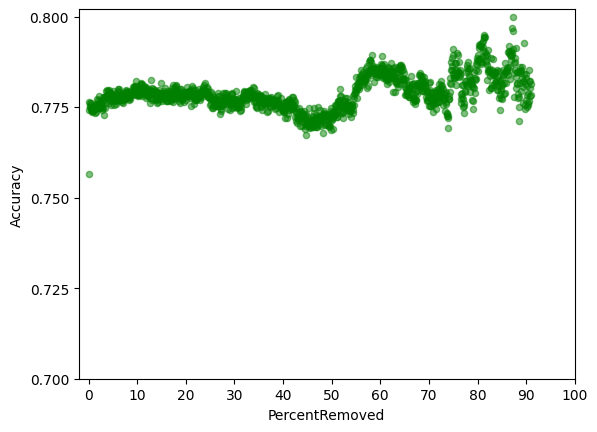

In [ ]:
ds_model_ctb_srt.plot.scatter('PercentRemoved', 'Accuracy', alpha=0.5, color='green')
plt.gca().set_xlim(-2, 100)
plt.xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.8, 0.025))
plt.show()